In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

resum_data = pd.read_csv('UpdatedResumeDataSet.csv',encoding='utf-8')
resum_data['cleaned_resume'] = ''
resum_data.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


In [3]:
print("Display the distinct categories of resume -")
print(resum_data['Category'].unique())

Display the distinct categories of resume -
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [4]:
print(resum_data['Category'].value_counts())

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='Category'>

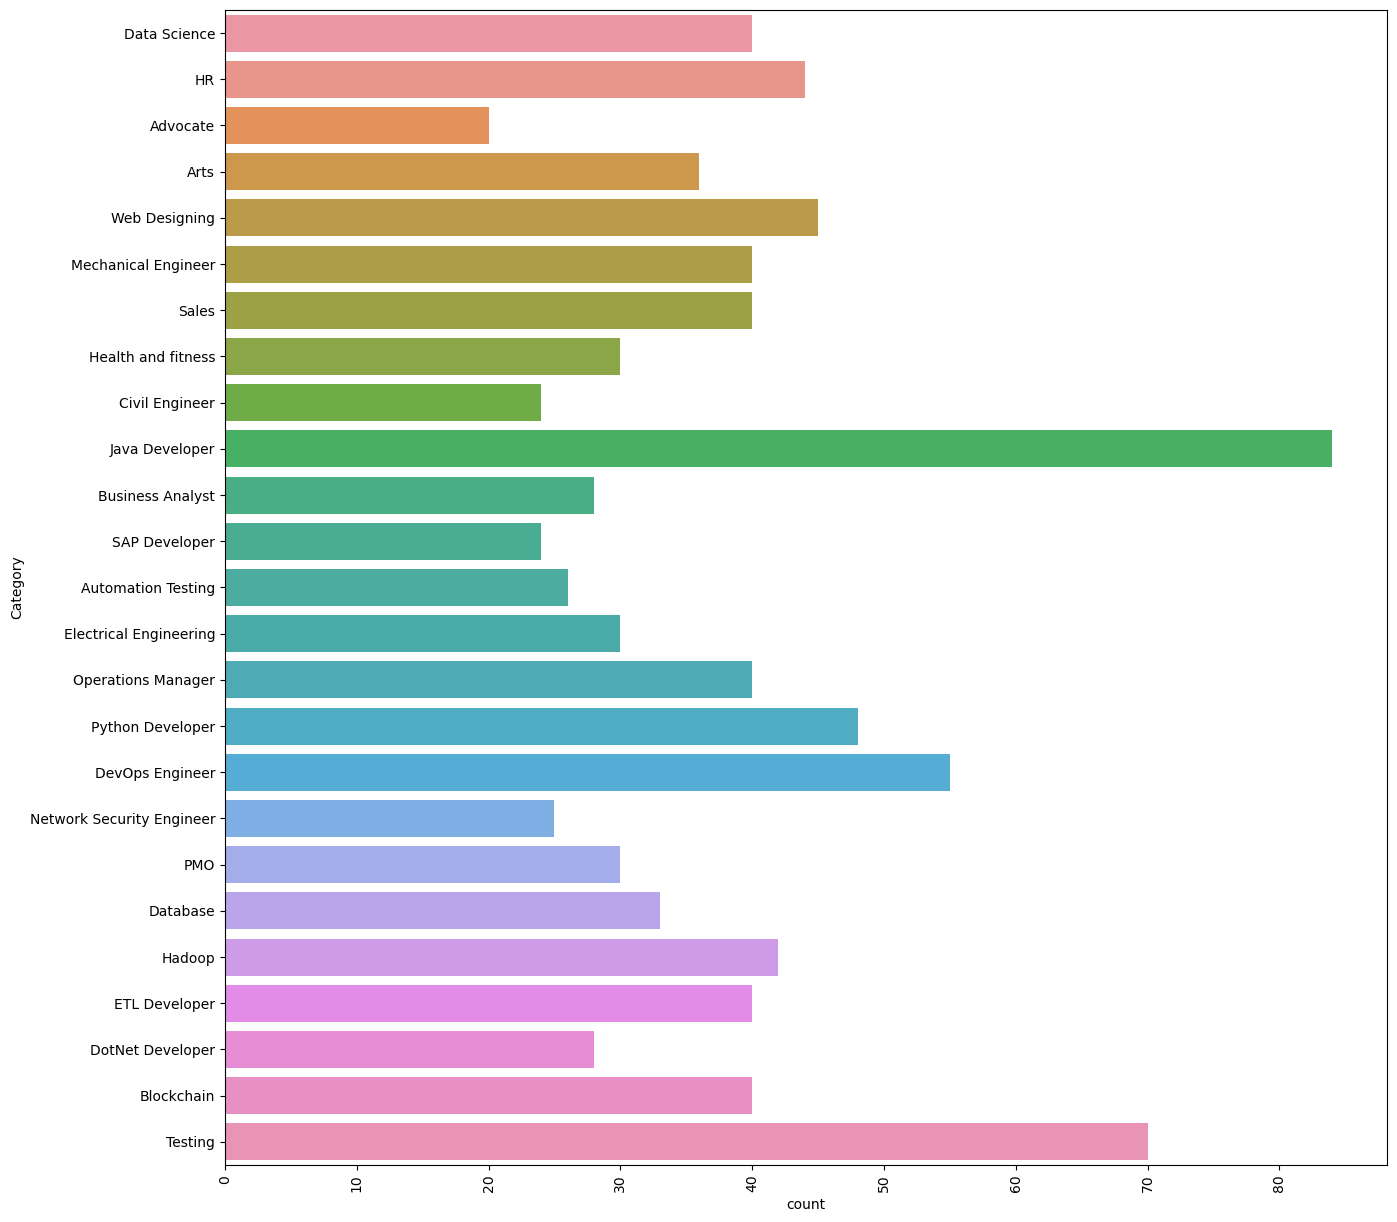

In [5]:
import seaborn as sns
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y='Category',data=resum_data)

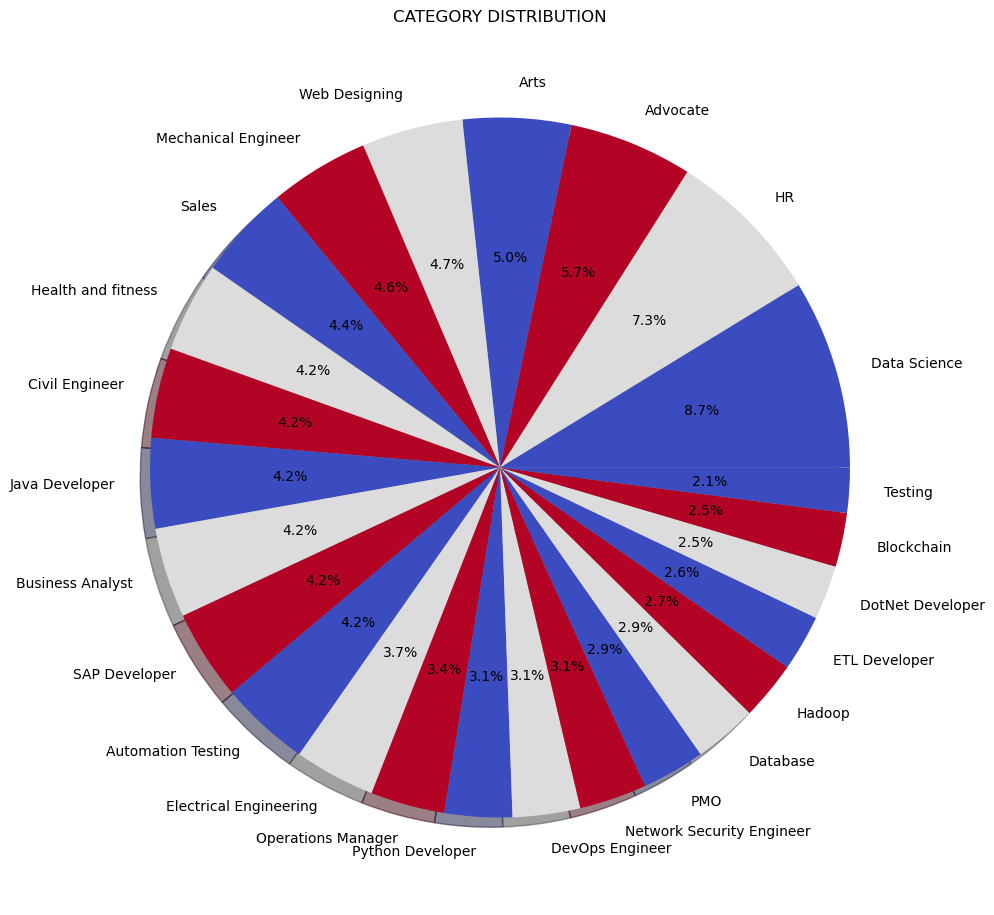

In [6]:
from matplotlib.gridspec import GridSpec
targetCounts = resum_data['Category'].value_counts()
targetLabels  = resum_data['Category'].unique()
plt.figure(1, figsize=(25,25))
the_grid = GridSpec(2, 2)

cmap = plt.get_cmap('coolwarm')
colors = [cmap(i) for i in np.linspace(0, 1, 3)]
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

In [12]:
import re
def cleanresume(resumetext):
    resumetext = re.sub('http\S+\s*', '',resumetext)
    resumetext = re.sub('RT|cc', ' ', resumetext)
    resumeText = re.sub('#\S+', '', resumetext)
    resumeText = re.sub('@\S+', '  ', resumetext)
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText)
    resumeText = re.sub('\s+', ' ', resumeText)
    return resumetext
resum_data['cleaned_resume'] = resum_data.Resume.apply(lambda x: cleanresume(x))


In [19]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\akash\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('â\x80¢', 542), ('Details', 484), ('Exprience', 446), ('months', 376), ('company', 326), ('description', 310), ('Ã±', 300), ('1', 286), ('year', 228), ('January', 216), ('Less', 204), ('Data', 196), ('data', 192), ('Maharashtra', 166), ('6', 160), ('Skill', 160), ('Science', 154), ('â\x97\x8f', 144), ('College', 140), ('I', 134), ('Education', 128), ('The', 126), ('project', 126), ('like', 126), ('Python', 124), ('Machine', 112), ('University', 112), ('â\x96ª', 108), ('Web', 106), ('using', 104), ('monthsCompany', 102), ('Learning', 100), ('time', 92), ('Project', 92), ('India', 90), ('Mumbai', 90), ('Pune', 90), ('Arts', 90), ('application', 84), ('SQL', 80), ('24', 76), ('various', 76), ('Software', 76), ('Responsibilities', 76), ('Nagpur', 76), ('learning', 74), ('Engineering', 74), ('projects', 74), ('Technologies', 72), ('Used', 72)]


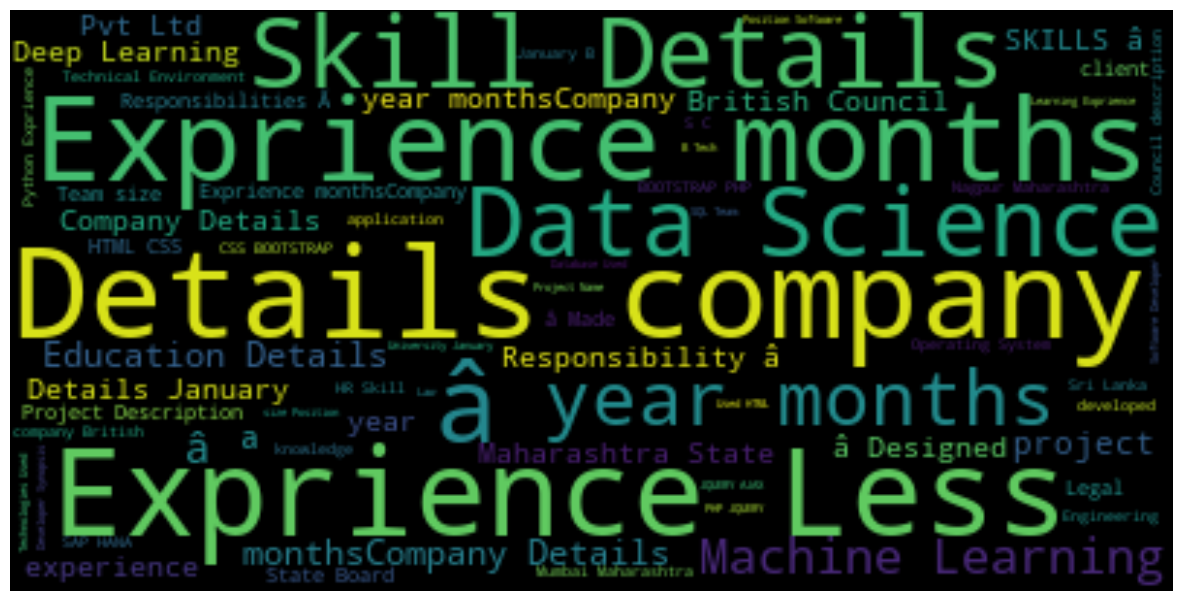

In [21]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')

onesetstopwords = set(stopwords.words('english') + ['``', "''"])

totalwords = []
Sentences = resum_data['Resume'].values
cleanedSentences = ""

for i in range(0, 160):
    cleanedText = cleanresume(Sentences[i])
    cleanedSentences += cleanedText
    requirewords = word_tokenize(cleanedText)
    
    # Filter words
    for word in requirewords:
        if word not in onesetstopwords and word not in string.punctuation:
            totalwords.append(word)

wordfreqdist = nltk.FreqDist(totalwords)

mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(15, 15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


In [23]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    resum_data[i] = le.fit_transform(resum_data[i])

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredtext = resum_data['cleaned_resume'].values
requiredtarget = resum_data['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(requiredtext)
wordfeatures = word_vectorizer.transform(requiredtext)

print("Feature completed..")

x_train,x_test,y_train,y_test = train_test_split(wordfeatures,requiredtarget,random_state=0,test_size=0.2)
print(x_train.shape)
print(x_test.shape)

Feature completed..
(769, 1500)
(193, 1500)


In [28]:
clasf = OneVsRestClassifier(KNeighborsClassifier())
clasf.fit(x_train,y_train)
prediction = clasf.predict(x_test)
print